# Zeinab Atef Abdallah&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ID : 211002157


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("spam.csv")

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

**DATA CLEANING**

In [ ]:
# Dropping unnessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Changing column names
df.rename(columns={'v1':'Target', 'v2':'Text'},inplace=True)

In [ ]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Checking for null values
df.isna().sum()

Target    0
Text      0
dtype: int64

In [ ]:
# Checking Duplicate values
df.duplicated().sum()

403

In [ ]:
# Drop Duplicate values
df=df.drop_duplicates()

In [ ]:
# Converting Target column into numerical 0 and 1
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['Target']=encoder.fit_transform(df['Target'])

/tmp/ipykernel_18/1614955790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target']=encoder.fit_transform(df['Target'])


In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


EXPLORATORY DATA ANALYSIS

In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Ham and Spam count
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

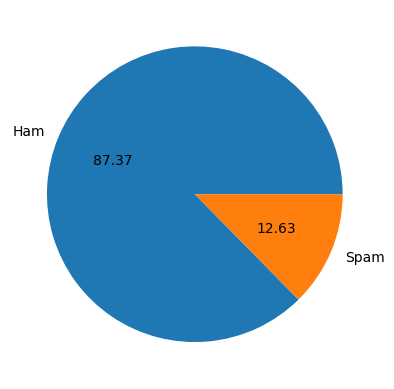

In [ ]:
# Check the Target value using pie chart
plt.pie(df['Target'].value_counts(), labels=['Ham','Spam'],autopct='%.2f')
plt.show()

**DATA PREPROCESSING**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Converting the text in lowercase
def process_text(text):
  text=text.lower()

#tokenization
  text=nltk.word_tokenize(text)

# removing stopwords an punctuation
  x=[]
  for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        x.append(i)

  text=x[:]
  x.clear()

# stemming
  ps=PorterStemmer()
  for i in text:
    x.append(ps.stem(i))


  return " ".join(x)


In [ ]:
df['Transformed_text']=df['Text'].apply(process_text)

In [ ]:
df.head()


,Target,Text,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy.. avail bugi n great wor...
1,0,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",nah n't think goe usf live around though


**MODEL BUILDING**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
# Fit and transform the 'Transformed_text' column
X = tfidf.fit_transform(df['Transformed_text'])


print("Shape of X:", X.shape)

Shape of X: (5169, 3000)


In [ ]:
y = df['Target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X.toarray(),y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8733075435203095
0.5150214592274678


In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9864603481624759
1.0


In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748549323017408
1.0
